In [1]:
cd ../system/

/Users/dorislee/Desktop/Research/viz/viz-summarization/system


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from lattice import *
from vizObj import *
from node import * 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
df = pd.read_csv("../data/mushrooms.csv")

In [4]:
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
def generateLattice(attributes):
	'''
	Given a list of categorical attributes, automatically generate 
	lattice structure with appropriate parent child relationship. 
	'''
    


In [6]:
attributes = ['cap_surface','cap_color','bruises']

1. determine all possible filters from given attribute names

In [7]:
from database import *

In [8]:
tablename='mushroom'
filters = {}
for attr in attributes: 
    filters.update(findDistinctAttrVal(attr,tablename))

In [9]:
filters

{'bruises': [u't', u'f'],
 'cap_color': [u'w', u'b', u'u', u'e', u'n', u'g', u'r', u'y', u'c', u'p'],
 'cap_surface': [u'y', u's', u'f', u'g']}

1. ~~determine all possible filters from given attribute names~~
2. __Generate all possible filter combinations__
3. Assign parent child relationships of each node (corresponding to a filter) to generate the lattice

In [10]:
def buildCondition(attribute,value):
    return str(attribute +"="+ value)

In [11]:
import itertools
from itertools import combinations

In [12]:
conditions = [[] for _i in filters.keys()]
for i,attr in enumerate(filters.keys()):
    for val in filters[attr]:
        conditions[i].append(buildCondition(attr,val))
    conditions[i].append("*")

In [80]:
node_filters=[]
for combination in itertools.product(*conditions):
    node_filters.append(combination)

In [69]:
def level(nodeFilter):
    # determine which level a filter lies in
    return len(nodeFilter) - nodeFilter.count('*')

In [85]:
node_filters_levels = np.array([level(nf) for nf in node_filters])
# node_filters = np.array([filter(lambda x: x != '*', a) for a in node_filters])
node_filters = np.array([list(filter(lambda x: x != '*', a)) for a in node_filters])

In [86]:
# print node_filters_levels.count(1)
# print node_filters_levels.count(2)
# #not exactly 16C2 =120 because not all attributes-values are independent, some share the same attributes
# print node_filters_levels.count(3)

In [87]:
idx = np.where(node_filters_levels==1)[0]

In [100]:
G = Lattice()
vobj = vizObj(x='type',y='id',filters=['*','*','*'],agg_func='COUNT')
root = vizNode(vobj,None)
G.addNode(root)

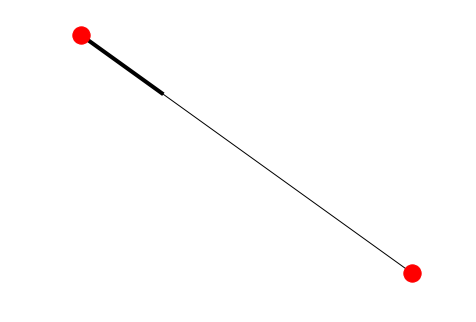

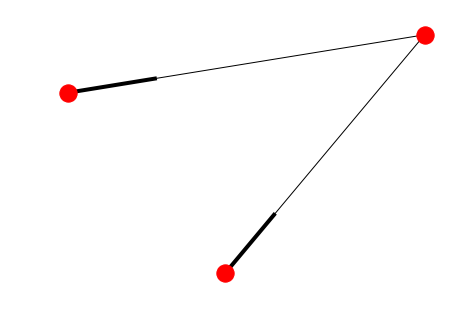

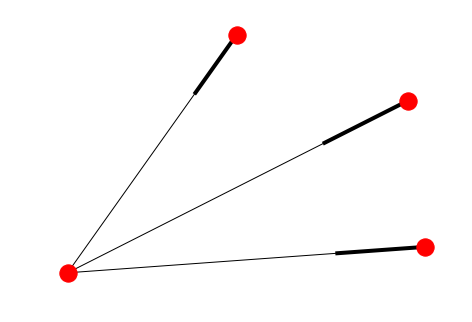

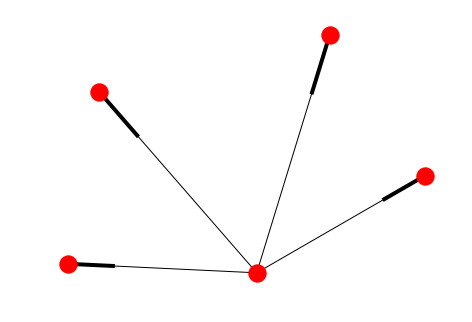

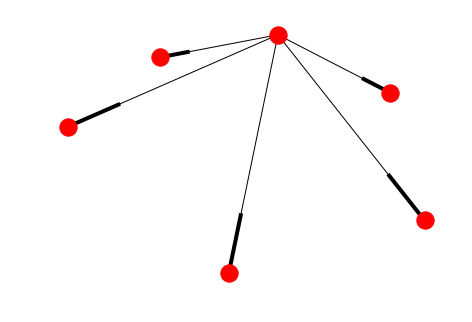

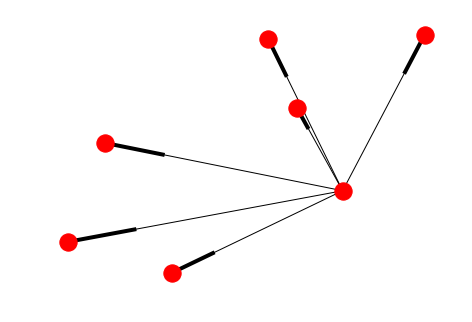

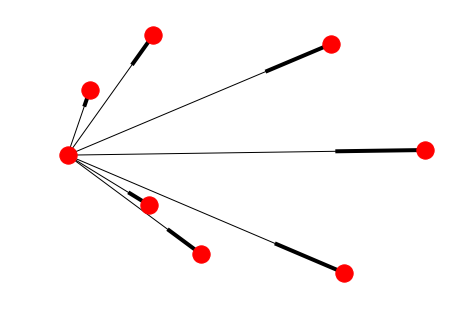

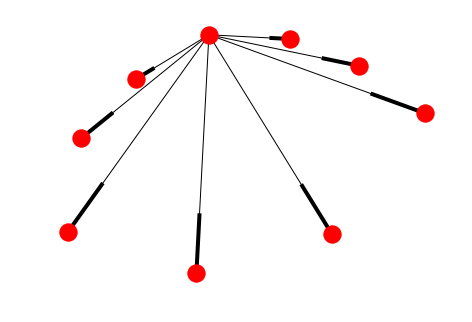

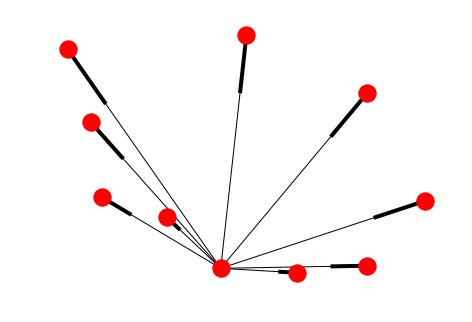

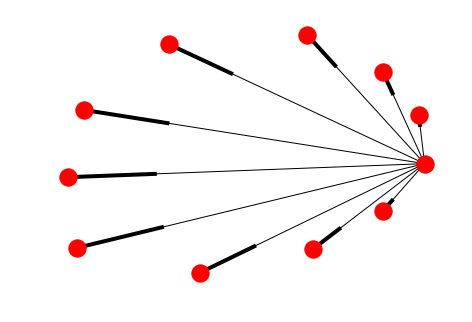

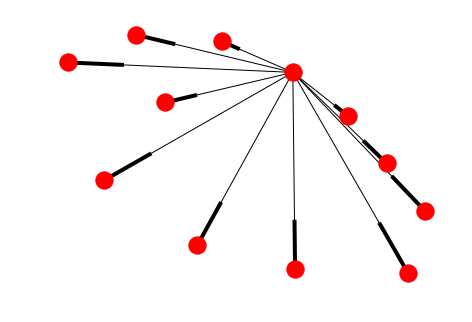

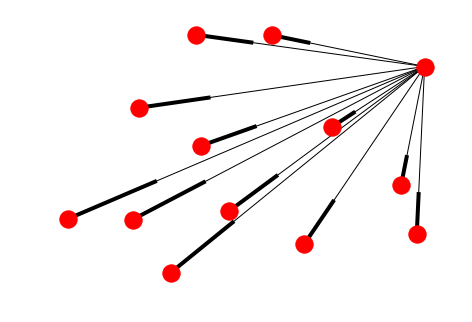

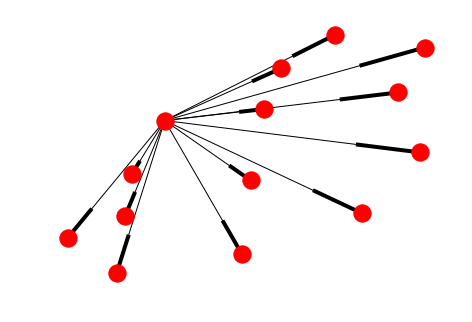

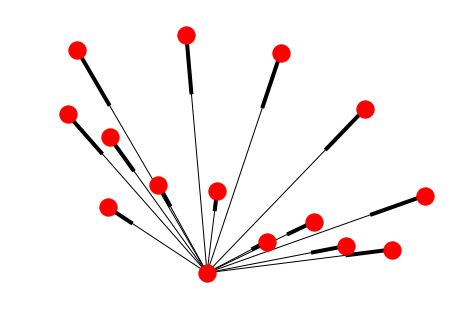

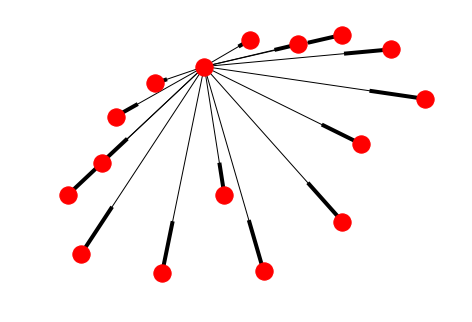

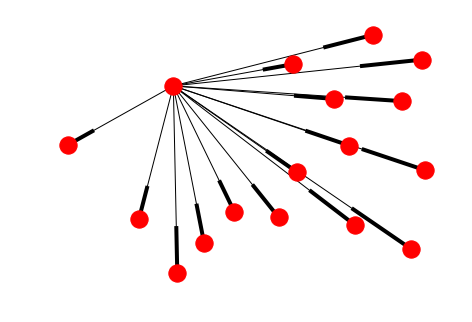

In [101]:
for nf in node_filters[idx]:
#     print nf
    vobj= vizObj(x='type',y='id',filters=list(nf),agg_func='COUNT')
    vnode = vizNode(viz=vobj,parents=[root])
    G.addNode(vnode)
#     print G.graph.node 
#     print "--------"
    #G.graph.add_node(str(list(nf)),vizObj=vnode)
    plt.figure()
    nx.draw(G.graph)

In [103]:
def arr2List(lst):
    return [list(_x) for _x in lst]

In [104]:
idx = np.where(node_filters_levels==2)[0]
level_n_filters=  node_filters[idx]

In [105]:
for nf in level_n_filters:
    vobj= vizObj(x='type',y='id',filters=nf,agg_func='COUNT')
    parent_lst = []
    for f in nf:
        if f!="*":
            parent_idx = np.where(['cap_color=w' in x for x in  level_n_filters ])[0]
            parent_lst.extend(level_n_filters[parent_idx])
    vnode = vizNode(viz=vobj,parents=arr2List(parent_lst))
    G.addNode(vnode)
    plt.figure()
    nx.draw(G.graph)

TypeError: unhashable type: 'list'

In [102]:
G.graph.add_node?

In [ ]:
vobj= vizObj(x='type',y='id',filters=nf,agg_func='COUNT')
    vnode = vizNode(viz=vobj,parents=[root])
    G.addNode(vnode)

In [ ]:
vobj= vizObj(x='type',y='id',filters=['cap_color=w', 'bruises=t', '*'],agg_func='COUNT')
vnode = vizNode()

In [ ]:


	nodeList = []

	for each in filters:
	 	if(str(each) == "root"):
	 		    root = vizNode(filters=["All"])
	 		    nodeList.append(root)


	for each in filters:
	 	if(str(each) != "root"):
	 				nodeList.append(vizNode(parents=[root], filters=[str(each)]))



	for idx, val in enumerate(filters):

	 		cuarr = val.split("=")
		if(val != "root"):
	 			current.set_parents(["root"])
		else
	 			continue
	 	for i in range(idx, len(filters)):
	 			cp = filters[i]
	 			cparr = cp.split("=")
	 			if cparr[0] != cuarr[0]: #different filter title
	 				combined = val + " AND " + cp

	 				combinedNode = vizNode(parents=[White, M], filters=["Race = White", "Gender = M"])